In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
data = fetch_olivetti_faces()
X = data.images
y = data.target
print (X.shape)
print (y.shape)

(400, 64, 64)
(400,)


In [3]:
X = data.images.reshape((400, 4096))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=50)

In [4]:
pca = PCA(n_components=100, whiten=True, random_state=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [5]:
clf = SVC(kernel='rbf', C=5, gamma=0.01, class_weight='balanced', random_state=50)
clf.fit(X_train_pca, y_train)

SVC(C=5, class_weight='balanced', gamma=0.01, random_state=50)

In [6]:
y_pred = clf.predict(X_test_pca)
print("accuracy", round(accuracy_score(y_test, y_pred), 4))
print(classification_report(y_test, y_pred))

accuracy 0.9875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          1

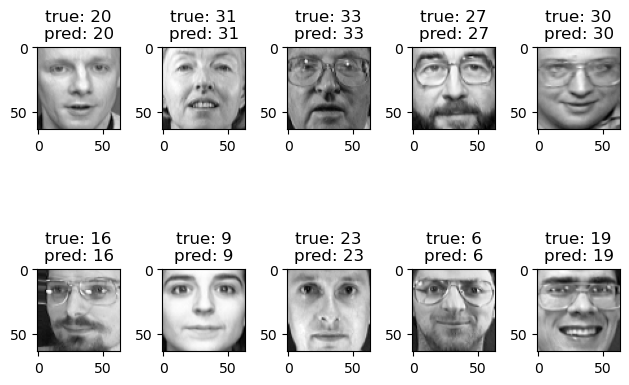

In [49]:
fig, axes = plt.subplots(2, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"true: {y_test[i]}\npred: {y_pred[i]}")
    
plt.tight_layout()
plt.show()

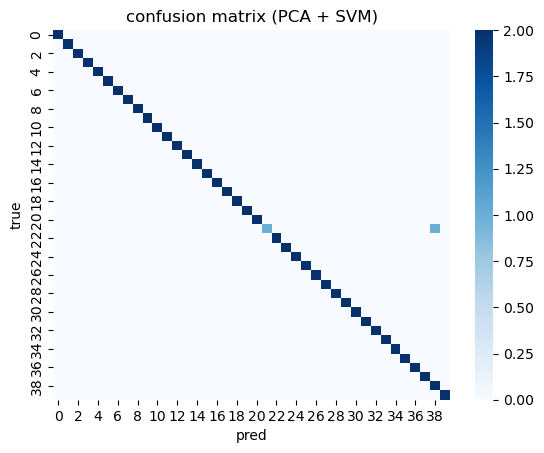

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sb.heatmap(cm, cmap='Blues')
plt.title("confusion matrix (PCA + SVM)")
plt.xlabel("pred")
plt.ylabel("true")
plt.show()